<a href="https://colab.research.google.com/github/Dharmasastha2005/Generative-Models-in-Biology-/blob/main/Genomics_GANS_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random DNA Sequence Generator and ML Motif Generator Logistic Regression

In [ ]:
import random

def generate_dna(length=20):
    nucleotides = ["A", "T", "G", "C"]
    return "".join(random.choice(nucleotides) for _ in range(length))

# Example
for _ in range(3):
    print(generate_dna(50))


TCCCTTACGGCTGGCACAACGCGTGTAACATGCAGCGAACAGTATGAGCG
CGCAACGTGGAGAAGGTCGACGACACGGATTAGTGGCTGGTGGGAGTTGT
GCAGTAATATTAGGAGCACCGGGTCGCGGCTCTTAGCTCGGTAGCTCTCG


In [ ]:
import random
import numpy as np
from sklearn.linear_model import LogisticRegression

# Generate toy DNA sequences
def random_dna(length=6):
    return "".join(random.choice("ATGC") for _ in range(length))

# Encode DNA as 0/1 (one-hot)
def one_hot_encode(seq):
    mapping = {"A":[1,0,0,0], "T":[0,1,0,0], "G":[0,0,1,0], "C":[0,0,0,1]}
    return np.array([mapping[x] for x in seq]).flatten()

# Fake dataset: "ATGCAT" = motif, rest random
X, y = [], []
for _ in range(100):
    X.append(one_hot_encode("ATGCAT")); y.append(1)
    X.append(one_hot_encode(random_dna())); y.append(0)

X, y = np.array(X), np.array(y)

# Train logistic regression
model = LogisticRegression()
model.fit(X, y)

# Generate new sequences + score
test_seq = [random_dna() for _ in range(10)]
for seq in test_seq:
    score = model.predict_proba([one_hot_encode(seq)])[0][1]
    print(seq, "score:", round(score,3))


GGGTTA score: 0.001
TAGTTG score: 0.001
GAACAA score: 0.011
CTGTCC score: 0.006
AAGCAG score: 0.333
CTGGGG score: 0.01
TGCAAT score: 0.013
GACAAA score: 0.001
TTGTAC score: 0.061
GCGAAA score: 0.011


Protein Sequence Generation and k-Means Clustering for Expression Profiles

In [ ]:
import random

codon_table = {
    "AUG": "M", "UUU": "F", "UUC": "F",
    "UUA": "L", "UUG": "L", "UAA":"*", "UAG":"*", "UGA":"*"
    # (keep short table for simplicity)
}

def generate_protein(length=7):
    codons = list(codon_table.keys())
    protein = "".join(codon_table[random.choice(codons)] for _ in range(length))
    return protein

print(generate_protein(10))


print(generate_protein(17))


LM*LMM****
FM**L*L**LL*LL**L


In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Simulate expression data (10 samples, 5 genes)
np.random.seed(42)
data = np.random.rand(10, 5) * 10  # values between 0-10
df = pd.DataFrame(data, columns=[f"Gene_{i+1}" for i in range(5)])

print("Original Expression Data:")
print(df)

# Cluster samples into 2 groups
kmeans = KMeans(n_clusters=3, random_state=42).fit(df)
df["Cluster"] = kmeans.labels_

print("\nCluster Assignments:")
print(df)

# Generate new synthetic samples around cluster centers
new_samples = []
for center in kmeans.cluster_centers_:
    # add small random noise to make it realistic
    synthetic = center + np.random.normal(0, 1, size=center.shape)
    new_samples.append(synthetic)

synthetic_df = pd.DataFrame(new_samples, columns=[f"Gene_{i+1}" for i in range(5)])
print("\nGenerated Synthetic Samples:")
print(synthetic_df)


Original Expression Data:
     Gene_1    Gene_2    Gene_3    Gene_4    Gene_5
0  3.745401  9.507143  7.319939  5.986585  1.560186
1  1.559945  0.580836  8.661761  6.011150  7.080726
2  0.205845  9.699099  8.324426  2.123391  1.818250
3  1.834045  3.042422  5.247564  4.319450  2.912291
4  6.118529  1.394939  2.921446  3.663618  4.560700
5  7.851760  1.996738  5.142344  5.924146  0.464504
6  6.075449  1.705241  0.650516  9.488855  9.656320
7  8.083973  3.046138  0.976721  6.842330  4.401525
8  1.220382  4.951769  0.343885  9.093204  2.587800
9  6.625223  3.117111  5.200680  5.467103  1.848545

Cluster Assignments:
     Gene_1    Gene_2    Gene_3    Gene_4    Gene_5  Cluster
0  3.745401  9.507143  7.319939  5.986585  1.560186        2
1  1.559945  0.580836  8.661761  6.011150  7.080726        0
2  0.205845  9.699099  8.324426  2.123391  1.818250        2
3  1.834045  3.042422  5.247564  4.319450  2.912291        0
4  6.118529  1.394939  2.921446  3.663618  4.560700        1
5  7.851760  1

Markov Chain DNA Generator  and PCA Sampling of Gene Expression

In [ ]:
import random

# Simple transition matrix
transitions = {
    "A": {"A":0.3, "T":0.3, "G":0.2, "C":0.2},
    "T": {"A":0.25,"T":0.25,"G":0.25,"C":0.25},
    "G": {"A":0.2, "T":0.2, "G":0.4, "C":0.2},
    "C": {"A":0.25,"T":0.25,"G":0.25,"C":0.25},
}

def markov_dna(length=30):
    seq = "A"
    for _ in range(length-1):
        current = seq[-1]
        choices, probs = zip(*transitions[current].items())
        seq += random.choices(choices, probs)[0]
    return seq

print(markov_dna(30))


print(markov_dna(10))

AATCCCATTTACAAGGGTCAATAGTAAGAG
AGGTTTAACC


In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Simulate gene expression (20 samples × 5 genes)
np.random.seed(42)
data = np.random.rand(20, 5) * 10
df = pd.DataFrame(data, columns=[f"Gene_{i+1}" for i in range(5)])

print("Original Data:")
print(df.head())

# Apply PCA
pca = PCA(n_components=2)  # reduce to 2 dimensions
X_pca = pca.fit_transform(df)

# Sample new points in PCA space
mean = X_pca.mean(axis=0)
cov = np.cov(X_pca.T)
synthetic_pca = np.random.multivariate_normal(mean, cov, size=5)

# Project back to gene space
synthetic_data = pca.inverse_transform(synthetic_pca)
synthetic_df = pd.DataFrame(synthetic_data, columns=df.columns)

print("\nSynthetic Generated Samples:")
print(synthetic_df.head())


Original Data:
     Gene_1    Gene_2    Gene_3    Gene_4    Gene_5
0  3.745401  9.507143  7.319939  5.986585  1.560186
1  1.559945  0.580836  8.661761  6.011150  7.080726
2  0.205845  9.699099  8.324426  2.123391  1.818250
3  1.834045  3.042422  5.247564  4.319450  2.912291
4  6.118529  1.394939  2.921446  3.663618  4.560700

Synthetic Generated Samples:
     Gene_1    Gene_2    Gene_3    Gene_4    Gene_5
0  5.713159  4.331149  4.326573  4.348498  3.600311
1  7.466840  5.110969  3.204600  0.495761 -0.051650
2  4.417407  4.651952  5.524985  5.692187  4.791121
3  8.742113  1.587919  0.704243  4.547503  4.166756
4  4.118129  6.258264  6.432800  3.435147  2.491031


Gaussian Expression Generator and Autoencoder

In [ ]:
import numpy as np
import pandas as pd

def generate_expression(num_genes=7, num_samples=5):
    data = {}
    for g in range(num_genes):
        mean = np.random.uniform(5, 15)   # mean expression
        std = np.random.uniform(1, 3)     # variability
        data[f"Gene_{g+1}"] = np.random.normal(mean, std, num_samples)
    return pd.DataFrame(data)

df = generate_expression()
print(df.head())


      Gene_1     Gene_2     Gene_3     Gene_4     Gene_5     Gene_6     Gene_7
0  13.951079  19.331064  14.391692  12.825626  16.114851   8.298451  14.932708
1  10.786162  17.549666  18.021737  11.389396  12.052409  13.203960  16.239606
2  10.119929  13.045437  10.419321  14.489619  11.146514  10.374887  12.022952
3  13.000968   9.646782  13.090279   9.604951  17.367178  15.446932  15.006208
4   9.245839  18.026237  14.713219  12.278464  15.275705  14.669782  15.679073


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras import layers, models

# Simulated gene expression data (100 samples × 5 genes)
np.random.seed(42)
data = np.random.rand(100, 5) * 10
df = pd.DataFrame(data, columns=[f"Gene_{i+1}" for i in range(5)])

# Autoencoder
input_dim = df.shape[1]
encoding_dim = 2  # compress to 2 latent features

input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(input_dim, activation='linear')(encoded)

autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train
autoencoder.fit(df, df, epochs=50, batch_size=10, verbose=0)

# Reconstruct
reconstructed = autoencoder.predict(df[:5])
print("Original Data (subset):")
print(df.head())
print("\nReconstructed Data:")
print(reconstructed)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Original Data (subset):
     Gene_1    Gene_2    Gene_3    Gene_4    Gene_5
0  3.745401  9.507143  7.319939  5.986585  1.560186
1  1.559945  0.580836  8.661761  6.011150  7.080726
2  0.205845  9.699099  8.324426  2.123391  1.818250
3  1.834045  3.042422  5.247564  4.319450  2.912291
4  6.118529  1.394939  2.921446  3.663618  4.560700

Reconstructed Data:
[[0.48156792 0.4819425  0.48166466 0.4831234  0.4773354 ]
 [0.48156792 0.4819425  0.48166466 0.4831234  0.4773354 ]
 [0.48156792 0.4819425  0.48166466 0.4831234  0.4773354 ]
 [0.48156792 0.4819425  0.48166466 0.4831234  0.4773354 ]
 [0.48156792 0.4819425  0.48166466 0.4831234  0.4773354 ]]


Variational Auto Encoder

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Small VAE for DNA (4 nucleotides, seq length 10)
seq_length = 10
vocab_size = 4  # A,T,G,C

# Encoder
inputs = keras.Input(shape=(seq_length, vocab_size))
x = layers.Flatten()(inputs)
z_mean = layers.Dense(8)(x)
z_log_var = layers.Dense(8)(x)

# Reparameterization
def sampling(args):
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], tf.shape(z_mean)[1]))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_var])

# Decoder
decoder_inputs = layers.Dense(seq_length * vocab_size, activation="softmax")(z)
outputs = layers.Reshape((seq_length, vocab_size))(decoder_inputs)

vae = keras.Model(inputs, outputs)
vae.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 10, 4)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 40)        │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 8)         │        328 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 8)         │        328 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda (Lambda)     │ (None, 8)         │          0 │ dense[0][0],      │
│                     │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 40)        │        360 │ lambda[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 10, 4)     │          0 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,016 (3.97 KB)

 Trainable params: 1,016 (3.97 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf

# Toy dataset again
X = np.array([[5,7,6],[6,8,7],[15,18,17],[25,24,23]], dtype="float32")

# Generator
generator = keras.Sequential([
    layers.Dense(8, activation="relu", input_shape=(5,)),
    layers.Dense(3, activation="linear")
])

# Discriminator
discriminator = keras.Sequential([
    layers.Dense(8, activation="relu", input_shape=(3,)),
    layers.Dense(1, activation="sigmoid")
])

discriminator.compile(optimizer="adam", loss="binary_crossentropy")

# GAN = generator + discriminator
discriminator.trainable = False
gan_input = keras.Input(shape=(5,))
gan_output = discriminator(generator(gan_input))
gan = keras.Model(gan_input, gan_output)
gan.compile(optimizer="adam", loss="binary_crossentropy")

# Training loop (simplified)
import numpy as np
for epoch in range(100):
    # Fake data
    noise = np.random.normal(0,1,(4,5))
    fake = generator.predict(noise, verbose=0)

    # Train discriminator
    X_real = X
    y_real = np.ones((X_real.shape[0],1))
    y_fake = np.zeros((fake.shape[0],1))
    discriminator.trainable = True
    discriminator.train_on_batch(X_real, y_real)
    discriminator.train_on_batch(fake, y_fake)

    # Train generator (via GAN)
    noise = np.random.normal(0,1,(4,5))
    y_gen = np.ones((4,1))
    discriminator.trainable = False
    gan.train_on_batch(noise, y_gen)

# Generate new expression
noise = np.random.normal(0,1,(1,5))
fake_sample = generator.predict(noise, verbose=0)
print("Generated fake gene expression:", fake_sample)

print(X)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Generated fake gene expression: [[ 1.153292   -0.609183    0.39442527]]
[[ 5.  7.  6.]
 [ 6.  8.  7.]
 [15. 18. 17.]
 [25. 24. 23.]]


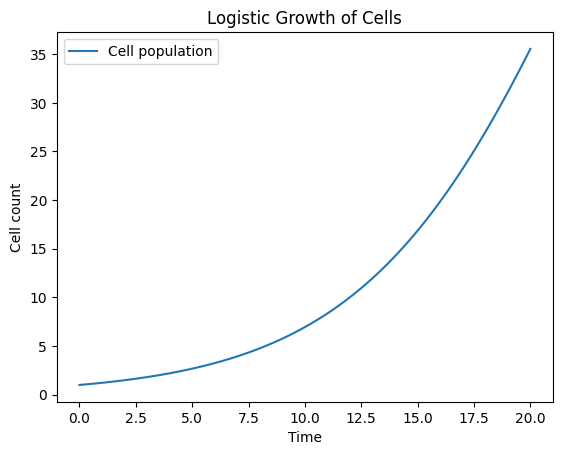

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 0.2       # growth rate
K = 100      # carrying capacity
N0 = 1        # initial population
t = np.linspace(0, 20, 100)

# Logistic growth function
def logistic_growth(t, r, K, N0):
    return K / (1 + ((K - N0) / N0) * np.exp(-r * t))

# Simulate
N = logistic_growth(t, r, K, N0)

# Plot
plt.plot(t, N, label="Cell population")
plt.xlabel("Time")
plt.ylabel("Cell count")
plt.title("Logistic Growth of Cells")
plt.legend()
plt.show()


In [ ]:
!pip install torchdiffeq

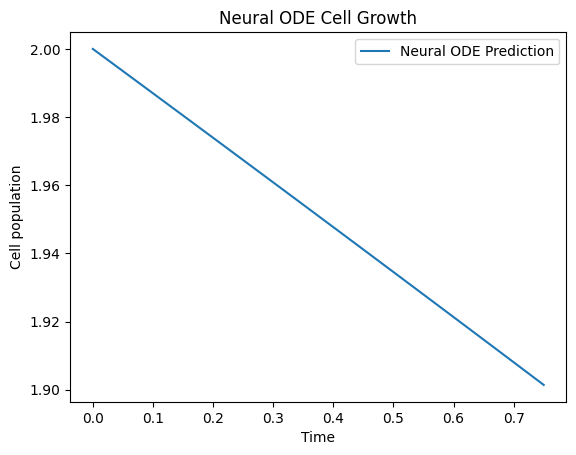

In [ ]:
import torch
import torch.nn as nn
import torchdiffeq

# Define ODE function as NN
class ODEFunc(nn.Module):
    def __init__(self):
        super(ODEFunc, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(1, 20),
            nn.Tanh(),
            nn.Linear(20, 1)
        )
    def forward(self, t, y):
        return self.net(y)

# Initial condition
y0 = torch.tensor([[2.0]])
t = torch.linspace(0., .75, 100)

# Define ODE solver
func = ODEFunc()
solver = torchdiffeq.odeint

# Simulate
with torch.no_grad():
    pred_y = solver(func, y0, t)

# Plot
import matplotlib.pyplot as plt
plt.plot(t.numpy(), pred_y.numpy().reshape(-1, 1), label="Neural ODE Prediction")
plt.xlabel("Time")
plt.ylabel("Cell population")
plt.title("Neural ODE Cell Growth")
plt.legend()
plt.show()

Generative Genomics Analysis through a dataset

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

# Scale data (important for regression)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train logistic regression
clf = LogisticRegression(max_iter=5000)
clf.fit(X_scaled, y)

# Logistic regression coefficients = weights for each feature
weights = clf.coef_[0]

# Generate synthetic sample (malignant/benign)
def generate_sample(class_label):
    mean = np.mean(X_scaled[y == class_label], axis=0)
    cov = np.cov(X_scaled[y == class_label], rowvar=False)
    synthetic = np.random.multivariate_normal(mean, cov)
    return synthetic

# Generate one malignant + one benign synthetic patient
synthetic_malignant = generate_sample(class_label=0)
synthetic_benign = generate_sample(class_label=1)

print("Synthetic Malignant Sample:")
print(pd.Series(synthetic_malignant, index=feature_names).head())
print("\nSynthetic Benign Sample:")
print(pd.Series(synthetic_benign, index=feature_names).head())


Synthetic Malignant Sample:
mean radius        1.525806
mean texture       1.208163
mean perimeter     1.661663
mean area          1.613125
mean smoothness    0.904395
dtype: float64

Synthetic Benign Sample:
mean radius       -0.485317
mean texture      -0.027359
mean perimeter    -0.504555
mean area         -0.461047
mean smoothness    0.514428
dtype: float64


In [ ]:
from sklearn.cluster import KMeans

# Cluster into 3 groups (subtypes)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Generate synthetic patient near cluster center
def generate_cluster_sample(cluster_id):
    center = kmeans.cluster_centers_[cluster_id]
    noise = np.random.normal(0, 0.2, size=center.shape)
    return center + noise

synthetic_cluster_0 = generate_cluster_sample(0)
synthetic_cluster_1 = generate_cluster_sample(1)
synthetic_cluster_2 = generate_cluster_sample(2)

print("\nSynthetic Patient from Cluster 0:")
print(pd.Series(synthetic_cluster_0, index=feature_names).head())

print("\nSynthetic Patient from Cluster 1:")
print(pd.Series(synthetic_cluster_1, index=feature_names).head())

print("\nSynthetic Patient from Cluster 2:")
print(pd.Series(synthetic_cluster_2, index=feature_names).head())


Synthetic Patient from Cluster 0:
mean radius       -0.237121
mean texture       0.071555
mean perimeter     0.082802
mean area         -0.385677
mean smoothness    0.565905
dtype: float64

Synthetic Patient from Cluster 1:
mean radius        1.400086
mean texture       0.640167
mean perimeter     1.364318
mean area          1.669975
mean smoothness    0.053117
dtype: float64

Synthetic Patient from Cluster 2:
mean radius       -0.323680
mean texture      -0.363713
mean perimeter    -0.460796
mean area          0.049655
mean smoothness   -0.382674
dtype: float64


The ML works with YEAST Dataset

In [1]:
import pandas as pd

# Define column names manually (as UCI dataset doesn’t have headers)
columns = [
    'ProteinName', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'Localization'
]

# Load dataset
data = pd.read_csv('yeast.data', sep='\s+', names=columns)

# View the first few rows
print(data.head())


<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-4228377739.py:9: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('yeast.data', sep='\s+', names=columns)


  ProteinName   mcg   gvh   alm   mit  erl  pox   vac   nuc Localization
0  ADT1_YEAST  0.58  0.61  0.47  0.13  0.5  0.0  0.48  0.22          MIT
1  ADT2_YEAST  0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22          MIT
2  ADT3_YEAST  0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22          MIT
3  AAR2_YEAST  0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22          NUC
4  AATM_YEAST  0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22          MIT


In [2]:
from sklearn.preprocessing import LabelEncoder

# Split features and labels
X = data.drop(['ProteinName', 'Localization'], axis=1)
y = data['Localization']

# Convert categorical labels into numeric
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

print("Encoded labels:", list(encoder.classes_))


Encoded labels: ['CYT', 'ERL', 'EXC', 'ME1', 'ME2', 'ME3', 'MIT', 'NUC', 'POX', 'VAC']


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Split 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=encoder.classes_, labels=encoder.transform(encoder.classes_)))

Accuracy: 0.5858585858585859

Classification Report:
               precision    recall  f1-score   support

         CYT       0.51      0.70      0.59        96
         ERL       0.00      0.00      0.00         0
         EXC       0.00      0.00      0.00         8
         ME1       0.62      0.62      0.62         8
         ME2       0.00      0.00      0.00         6
         ME3       0.93      0.74      0.82        34
         MIT       0.67      0.56      0.61        52
         NUC       0.54      0.54      0.54        85
         POX       1.00      1.00      1.00         2
         VAC       0.00      0.00      0.00         6

    accuracy                           0.59       297
   macro avg       0.43      0.42      0.42       297
weighted avg       0.57      0.59      0.57       297



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/me

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1854768915.py:10: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('yeast.data', sep='\s+', names=columns)


Silhouette Score: 0.17519558169353688
Adjusted Rand Index (vs true labels): 0.12240529393132814


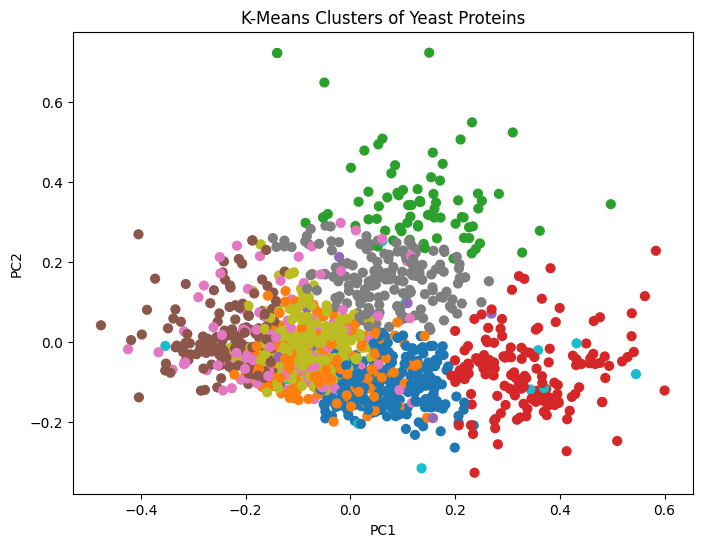

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load dataset again
columns = ['ProteinName', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'Localization']
data = pd.read_csv('yeast.data', sep='\s+', names=columns)

# Prepare numeric data
X = data.drop(['ProteinName', 'Localization'], axis=1)
y = data['Localization']

# Encode labels (for comparison, not for training)
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Choose number of clusters (you can tune this)
k = len(encoder.classes_)  # 10 clusters = one per compartment type
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Evaluate clustering quality
print("Silhouette Score:", silhouette_score(X, clusters))
print("Adjusted Rand Index (vs true labels):", adjusted_rand_score(y_encoded, clusters))

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='tab10', s=40)
plt.title("K-Means Clusters of Yeast Proteins")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()



<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1281232599.py:8: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('yeast.data', sep='\s+', names=columns)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

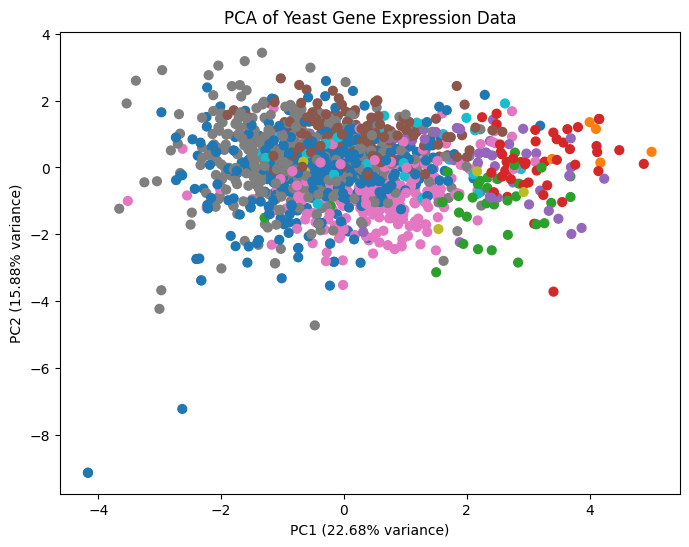

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load dataset
columns = ['ProteinName', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'Localization']
data = pd.read_csv('yeast.data', sep='\s+', names=columns)

# Features and labels
X = data.drop(['ProteinName', 'Localization'], axis=1)
y = data['Localization']

# Encode labels for coloring
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_encoded, cmap='tab10', s=40)
plt.title('PCA of Yeast Gene Expression Data')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)')
plt.legend(handles=scatter.legend_elements()[0], labels=encoder.classes_, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\s'
<>:11: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-699685527.py:11: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('yeast.data', sep='\s+', names=columns)


Epoch 0, Loss: 1.1348
Epoch 10, Loss: 1.0976
Epoch 20, Loss: 1.0673
Epoch 30, Loss: 1.0462
Epoch 40, Loss: 1.0329
Epoch 50, Loss: 1.0259
Epoch 60, Loss: 1.0169
Epoch 70, Loss: 1.0154
Epoch 80, Loss: 1.0157
Epoch 90, Loss: 1.0127


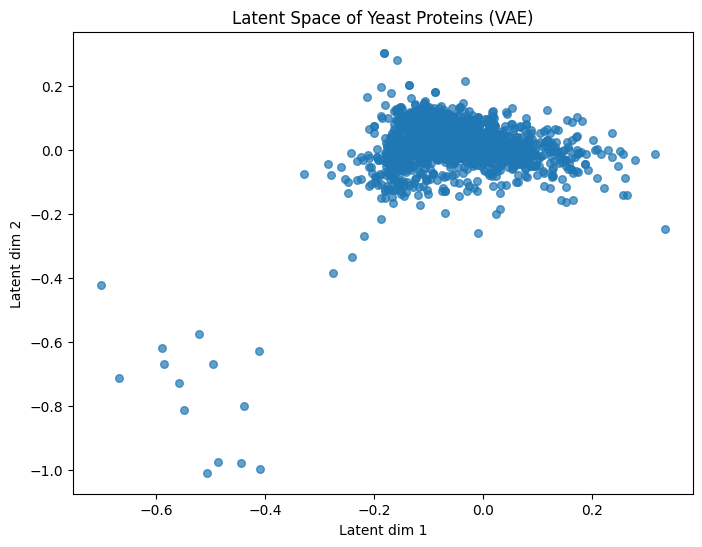

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# ---- Load and prepare dataset ----
columns = ['ProteinName', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'Localization']
data = pd.read_csv('yeast.data', sep='\s+', names=columns)
X = data.drop(['ProteinName', 'Localization'], axis=1).values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert to torch tensors
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

# ---- Define the Variational Autoencoder ----
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.fc1 = nn.Linear(input_dim, 16)
        self.fc_mu = nn.Linear(16, latent_dim)
        self.fc_logvar = nn.Linear(16, latent_dim)
        self.fc2 = nn.Linear(latent_dim, 16)
        self.fc3 = nn.Linear(16, input_dim)

    def encode(self, x):
        h = torch.relu(self.fc1(x))
        return self.fc_mu(h), self.fc_logvar(h)

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h = torch.relu(self.fc2(z))
        return self.fc3(h)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon = self.decode(z)
        return recon, mu, logvar

# ---- Initialize model ----
vae = VAE(input_dim=8, latent_dim=2)
optimizer = optim.Adam(vae.parameters(), lr=0.001)
criterion = nn.MSELoss()

# ---- Train ----
epochs = 100
for epoch in range(epochs):
    vae.train()
    optimizer.zero_grad()
    recon, mu, logvar = vae(X_tensor)
    mse_loss = criterion(recon, X_tensor)
    kl_loss = -0.5 * torch.mean(1 + logvar - mu.pow(2) - logvar.exp())
    loss = mse_loss + kl_loss
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# ---- Extract latent space ----
vae.eval()
with torch.no_grad():
    mu, _ = vae.encode(X_tensor)
latent = mu.numpy()

plt.figure(figsize=(8,6))
plt.scatter(latent[:,0], latent[:,1], s=30, alpha=0.7)
plt.title("Latent Space of Yeast Proteins (VAE)")
plt.xlabel("Latent dim 1")
plt.ylabel("Latent dim 2")
plt.show()


<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-119677464.py:10: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('yeast.data', sep='\s+', names=columns)


Epoch 0, D_loss: 1.4419, G_loss: 0.6067
Epoch 50, D_loss: 1.3587, G_loss: 0.6790
Epoch 100, D_loss: 1.3141, G_loss: 0.7035
Epoch 150, D_loss: 1.3102, G_loss: 0.6862
Epoch 200, D_loss: 1.2517, G_loss: 0.7270
Epoch 250, D_loss: 1.3578, G_loss: 0.7194


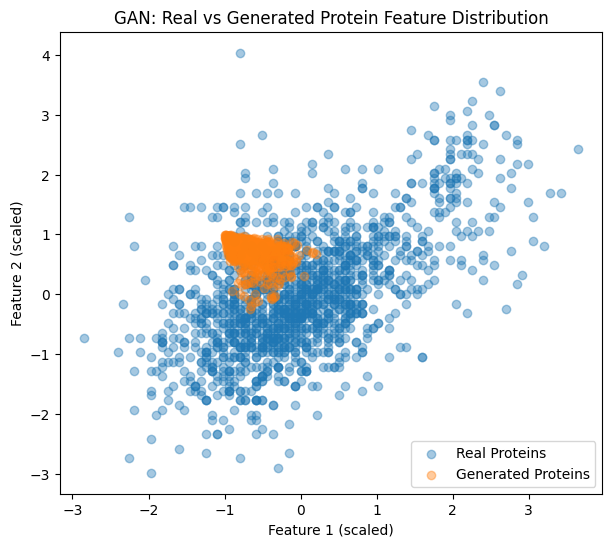

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# ---- Load and scale dataset ----
columns = ['ProteinName', 'mcg', 'gvh', 'alm', 'mit', 'erl', 'pox', 'vac', 'nuc', 'Localization']
data = pd.read_csv('yeast.data', sep='\s+', names=columns)
X = data.drop(['ProteinName', 'Localization'], axis=1).values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

real_data = torch.tensor(X_scaled, dtype=torch.float32)

# ---- Define Generator and Discriminator ----
latent_dim = 8  # size of random noise input

class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.Tanh()
        )

    def forward(self, z):
        return self.model(z)

class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.LeakyReLU(0.2),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# Initialize
G = Generator(latent_dim, 8)
D = Discriminator(8)
criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=0.001)
optimizer_D = optim.Adam(D.parameters(), lr=0.001)

# ---- Training loop ----
epochs = 300
for epoch in range(epochs):
    # === Train Discriminator ===
    real_labels = torch.ones((real_data.size(0), 1))
    fake_labels = torch.zeros((real_data.size(0), 1))

    # Real data
    outputs_real = D(real_data)
    d_loss_real = criterion(outputs_real, real_labels)

    # Fake data
    z = torch.randn((real_data.size(0), latent_dim))
    fake_data = G(z)
    outputs_fake = D(fake_data.detach())
    d_loss_fake = criterion(outputs_fake, fake_labels)

    # Combine losses
    d_loss = d_loss_real + d_loss_fake
    optimizer_D.zero_grad()
    d_loss.backward()
    optimizer_D.step()

    # === Train Generator ===
    z = torch.randn((real_data.size(0), latent_dim))
    fake_data = G(z)
    outputs = D(fake_data)
    g_loss = criterion(outputs, real_labels)  # wants D to think fakes are real
    optimizer_G.zero_grad()
    g_loss.backward()
    optimizer_G.step()

    if epoch % 50 == 0:
        print(f"Epoch {epoch}, D_loss: {d_loss.item():.4f}, G_loss: {g_loss.item():.4f}")

# ---- Generate new synthetic proteins ----
z = torch.randn(500, latent_dim)
generated = G(z).detach().numpy()

plt.figure(figsize=(7,6))
plt.scatter(X_scaled[:,0], X_scaled[:,1], alpha=0.4, label='Real Proteins')
plt.scatter(generated[:,0], generated[:,1], alpha=0.4, label='Generated Proteins')
plt.legend()
plt.title("GAN: Real vs Generated Protein Feature Distribution")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()
